In this project, I follow a step-by-step approach to build a thermal face recognition pipeline, which includes the components of data processing, data ingestion, model training and model evaluation. <br> 
The thermal face recognition system that we are going to design uses convolutional neural networks and the strategy of fine-tuning to leverage previously large trained models. <br>
The dataset of thermal face images corresponds to the [Terravic Facial IR Database](https://vcipl-okstate.org/pbvs/bench/Data/04/download.html), which is comprised by 20 collections of thermal face images, where each collection is associated to an individual. However, 2 of the collections are corrupted and can't be downloaded, so we can only work with 18 collections of thermal face images. In the next figure, you can see some thermal images from this dataset. <br><br>

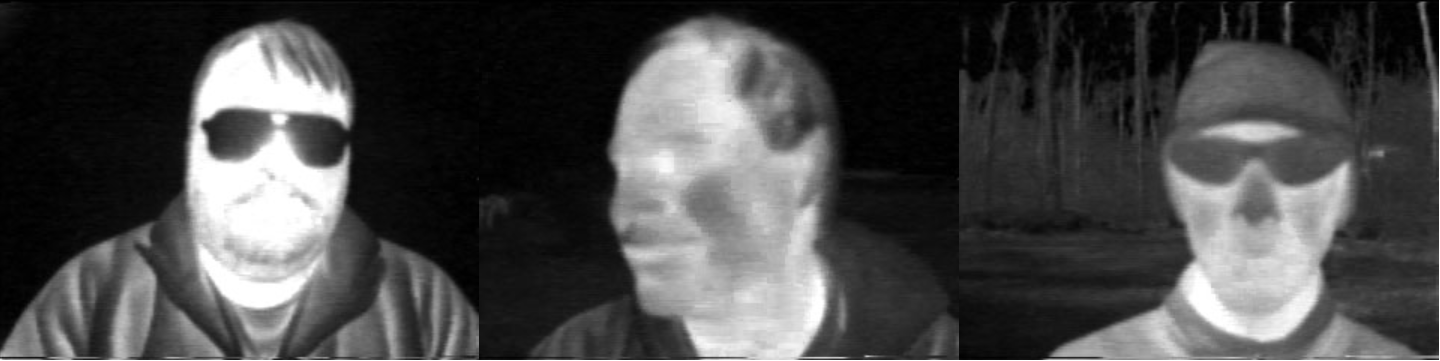


In the following link, you can find the complete downloaded Terravic Facial IR Database with the 18 valid collections of thermal images. I share this link to anyone interested in easily replicate all the operations performed in this project <br>
Link Google Drive: https://drive.google.com/drive/folders/1HhNXDqfuXckBl8EOBi_NEJcyNIVKIcdp?usp=share_link

# **Start of the pipeline**

First, it is necessary to synchronize the current Google Collab sesion with my Google Drive account, since I saved the Terravic Facial IR Database there.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Some default imports
import random, os, shutil
import imageio
import cv2
import numpy as np
import PIL

# **Unzip the dataset**

In [3]:
from zipfile import ZipFile
cont = 0
for cont in range(1,21): #cont = 1
  if cont < 10 and cont != 5 and cont != 6:
    file_name = '/content/drive/My Drive/Terravic_Facial_IR_Database/face0{}.zip'.format(cont)
  elif cont >= 10:
    file_name = '/content/drive/My Drive/Terravic_Facial_IR_Database/face{}.zip'.format(cont)
  with ZipFile(file_name, 'r') as zip: 
    zip.extractall('Terravic_Original') 

# **Rename the classes from the dataset**

This operation is important to easily manage the names of the folders that contains the sample images of each person, since it should be considered that collections 5 and 6 are corrupted and we can not access them.

In [4]:
import os

for i in range(1,21):
  if i >= 7 and i <= 9:
    os.rename('Terravic_Original/face0{}'.format(i), 'Terravic_Original/face0{}'.format(i - 2))
  elif i >= 10 and i <= 11:
    os.rename('Terravic_Original/face{}'.format(i), 'Terravic_Original/face0{}'.format(i - 2))
  elif i >= 12:
    os.rename('Terravic_Original/face{}'.format(i), 'Terravic_Original/face{}'.format(i - 2))

In [5]:
#This code helps us to know how many images comprise each folder/collection
import os
for i in range(1,19):
  if i < 10:
    print('total  images in Terravic_Original/face0{}:'.format(i), len(os.listdir('Terravic_Original/face0{}/'.format(i))))
  else:
    print('total  images in Terravic_Original/face{}:'.format(i), len(os.listdir('Terravic_Original/face{}/'.format(i))))

total  images in Terravic_Original/face01: 227
total  images in Terravic_Original/face02: 620
total  images in Terravic_Original/face03: 592
total  images in Terravic_Original/face04: 487
total  images in Terravic_Original/face05: 1297
total  images in Terravic_Original/face06: 857
total  images in Terravic_Original/face07: 1117
total  images in Terravic_Original/face08: 283
total  images in Terravic_Original/face09: 434
total  images in Terravic_Original/face10: 2179
total  images in Terravic_Original/face11: 1417
total  images in Terravic_Original/face12: 1482
total  images in Terravic_Original/face13: 1125
total  images in Terravic_Original/face14: 1611
total  images in Terravic_Original/face15: 2632
total  images in Terravic_Original/face16: 2215
total  images in Terravic_Original/face17: 2539
total  images in Terravic_Original/face18: 1670


# **Build the training, validation and test sets**

**Shuffle the dataset**

In [6]:
os.mkdir('Terravic_Shuffled')

In [7]:
#Creación de carpetas
for i in range(1,19):
  if i < 10: #i = 0
    dest_train = 'Terravic_Shuffled/face0{}/'.format(i) # dest_train = 'Terravic_Shuffled/face01/'
  elif i >= 10:
    dest_train = 'Terravic_Shuffled/face{}/'.format(i)
  os.mkdir(dest_train)


for index_class in range(1,19): #index_class = 1
  sample = 0
  if index_class < 10: 
    class_path = 'Terravic_Original/face0{}/'.format(index_class) #class_path = 'Terravic_Original/face01/'
  elif index_class >= 10:
    class_path = 'Terravic_Original/face{}/'.format(index_class)

  #Extract the images corresponding to each person
  lst = sorted(os.listdir(class_path))

  #Shuffling the dataset
  random.shuffle(lst)

  for file_name in lst:
    img_person = imageio.imread(class_path + file_name)
    if index_class < 10:
      if sample < 10:                                                       #0000.jpg
        imageio.imwrite('Terravic_Shuffled/face0{}/'.format(index_class) + '000{}.jpg'.format(sample), img_person)
      elif sample >= 10 and sample < 100:
        imageio.imwrite('Terravic_Shuffled/face0{}/'.format(index_class) + '00{}.jpg'.format(sample), img_person)
      elif sample >= 100 and sample < 1000:
        imageio.imwrite('Terravic_Shuffled/face0{}/'.format(index_class) + '0{}.jpg'.format(sample), img_person)
      else:
        imageio.imwrite('Terravic_Shuffled/face0{}/'.format(index_class) + '{}.jpg'.format(sample), img_person)
      
      sample = sample + 1

    else:
      if sample < 10:
        imageio.imwrite('Terravic_Shuffled/face{}/'.format(index_class) + '000{}.jpg'.format(sample), img_person)
      elif sample >= 10 and sample < 100:
        imageio.imwrite('Terravic_Shuffled/face{}/'.format(index_class) + '00{}.jpg'.format(sample), img_person)
      elif sample >= 100 and sample < 1000:
        imageio.imwrite('Terravic_Shuffled/face{}/'.format(index_class) + '0{}.jpg'.format(sample), img_person)
      else:
        imageio.imwrite('Terravic_Shuffled/face{}/'.format(index_class) + '{}.jpg'.format(sample), img_person)
      
      sample = sample + 1

The next cell is useful to be sure that each collection in both Terravic_Original and Terravic_Shuffled has the same number of sample images, with the only difference being that in Terravic_Shuffled, the thermal images from each collection are shuffled.

In [8]:
#Proof
import os
for i in range(1,19):
  if i < 10:
    print('total  images in Terravic_Shuffled/face0{}:'.format(i), len(os.listdir('Terravic_Shuffled/face0{}/'.format(i))))
  else:
    print('total  images in Terravic_Shuffled/face{}:'.format(i), len(os.listdir('Terravic_Shuffled/face{}/'.format(i))))

total  images in Terravic_Shuffled/face01: 227
total  images in Terravic_Shuffled/face02: 620
total  images in Terravic_Shuffled/face03: 592
total  images in Terravic_Shuffled/face04: 487
total  images in Terravic_Shuffled/face05: 1297
total  images in Terravic_Shuffled/face06: 857
total  images in Terravic_Shuffled/face07: 1117
total  images in Terravic_Shuffled/face08: 283
total  images in Terravic_Shuffled/face09: 434
total  images in Terravic_Shuffled/face10: 2179
total  images in Terravic_Shuffled/face11: 1417
total  images in Terravic_Shuffled/face12: 1482
total  images in Terravic_Shuffled/face13: 1125
total  images in Terravic_Shuffled/face14: 1611
total  images in Terravic_Shuffled/face15: 2632
total  images in Terravic_Shuffled/face16: 2215
total  images in Terravic_Shuffled/face17: 2539
total  images in Terravic_Shuffled/face18: 1670


**Creation of training, validation and test folders with their corresponding folders for each person**

In [9]:
datasets = ['train', 'validation', 'test']

for dataset_name in datasets:
  os.mkdir(dataset_name)
  for i in range(1,19):
    if i < 10:
      dest_train = dataset_name+'/face0{}/'.format(i) #dest_train = 'train/face02/
    elif i >= 10:
      dest_train = dataset_name+'/face{}/'.format(i)
    os.mkdir(dest_train)

In [10]:
def fill_dataset(src_dataset, dest_dataset, face_index, limit_low, limit_upper): 
#fill_dataset('Terravic_Shuffled','test', 1, limit_validation + 127, limit_validation + limit_test + 127) 
  if face_index < 10:
    src_path = src_dataset+'/face0{}/'.format(face_index)
    dest_path = dest_dataset+'/face0{}/'.format(face_index)
  else:
    src_path = src_dataset+'/face{}/'.format(face_index)
    dest_path = dest_dataset+'/face{}/'.format(face_index)

  lst = sorted(os.listdir(src_path))
        
  for file_name in lst[limit_low:limit_upper]: #lst[177,227]
    if limit_low < limit_upper:
      img_original = imageio.imread(src_path + file_name)
      if limit_low < 10:
          imageio.imwrite(dest_path + '000{}.jpg'.format(limit_low), img_original)
      elif limit_low >= 10 and limit_low < 100:
          imageio.imwrite(dest_path + '00{}.jpg'.format(limit_low), img_original)
      else: 
          imageio.imwrite(dest_path + '0{}.jpg'.format(limit_low), img_original)
              
      limit_low = limit_low + 1

**Allocation of thermal images in the training, validation and test sets**

In relation to the training set, we assign 127 thermal images for each of the 18 individuals or classes, while the rest of thermal images corresponding to each person, is assigned to the validation and test sets in equal proportion. For example, person 4 has in total 487 thermal images, so after using 127 images for the training set, the remaining 360 images are distributed equally in the validation and test set, with 180 images allocated in the validation set and the remaining 180 images in the test set. This same procedures applies to the thermal images of the 18 individuals.

In [11]:
for i in range (1, 19):
  if i < 10:
    total = len(os.listdir('Terravic_Shuffled/face0{}'.format(i))) # person01 tiene 227, total = 227
  else:
    total = len(os.listdir('Terravic_Shuffled/face{}'.format(i)))
  limit1 = total - 127 # limit1 = 1482 - 127 = 1355
  if limit1 % 2 == 0:
    limit_validation = int(limit1 / 2) #limit_validation = 50
    limit_test = limit_validation ##limit_test = 50
  else:
    limit_validation = limit1 // 2 #-> limit_validation = 677
    limit_test = (limit1 // 2) + 1 #-> limit_test = 678

  fill_dataset('Terravic_Shuffled','train', i, 0, 127)
  print(limit_validation + 127)
  fill_dataset('Terravic_Shuffled','validation', i, 127, limit_validation + 127) 
  fill_dataset('Terravic_Shuffled','test', i, limit_validation + 127, limit_validation + limit_test + 127)

177
373
359
307
712
492
622
205
280
1153
772
804
626
869
1379
1171
1333
898


To be sure about the consistency of the thermal images distribution, the code in the next cell will help us to see that for each person, its thermal images have been properly distributed along the training, validation and test sets, following the strategy previously described.

In [12]:
import os
for i in range(1, 19):
  if i < 10:
    print('total  images in train/face0{}:'.format(i), len(os.listdir('train/face0{}/'.format(i))))
    print('total  images in validation/face0{}:'.format(i), len(os.listdir('validation/face0{}/'.format(i))))
    print('total  images in test/face0{}:'.format(i), len(os.listdir('test/face0{}/'.format(i))))
  else:
    print('total  images in train/face{}:'.format(i), len(os.listdir('train/face{}/'.format(i))))
    print('total  images in validation/face{}:'.format(i), len(os.listdir('validation/face{}/'.format(i))))
    print('total  images in test/face{}:'.format(i), len(os.listdir('test/face{}/'.format(i))))

total  images in train/face01: 127
total  images in validation/face01: 50
total  images in test/face01: 50
total  images in train/face02: 127
total  images in validation/face02: 246
total  images in test/face02: 247
total  images in train/face03: 127
total  images in validation/face03: 232
total  images in test/face03: 233
total  images in train/face04: 127
total  images in validation/face04: 180
total  images in test/face04: 180
total  images in train/face05: 127
total  images in validation/face05: 585
total  images in test/face05: 585
total  images in train/face06: 127
total  images in validation/face06: 365
total  images in test/face06: 365
total  images in train/face07: 127
total  images in validation/face07: 495
total  images in test/face07: 495
total  images in train/face08: 127
total  images in validation/face08: 78
total  images in test/face08: 78
total  images in train/face09: 127
total  images in validation/face09: 153
total  images in test/face09: 154
total  images in train/

At this point, we have successfully created our training, validation and test sets, meaning that we are ready to undertake the model training phase.

# **Thermal face recognition system**

**Proceed to set up the paths for the training, validation and test sets**

In [13]:
train_dir = os.path.join('train')
validation_dir = os.path.join('validation')
test_dir = os.path.join('test')

**Load the VGG16 architecture**

In [14]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(72, 96, 3)) 

conv_base.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 72, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 72, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 72, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 36, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 36, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 36, 48, 128)       147584    
                                                              

**Freeze and unfreeze certain layers (Fine-tuning)**

We freeze all the blocks from the VGG16 architecture, except for the last block (block 5) and its corresponding layers.

In [15]:
for layer in conv_base.layers:
    if layer.name[:6] == 'block5': 
      layer.trainable = True
    else:
      layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 72, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 72, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 72, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 36, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 36, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 36, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 18, 24, 128)       0     

# **Definition of the architecture**

As we can see in the following cell, our architecture consists in the VGG16 model followd by a MaxPooling layer and a BatchNormalization layer. The final layer is comprised by 18 neurons, representing the 18 indivuals or classes of the Terravic IR Facial Database.

In [18]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization()) #Normalizar los pesos aprendidos hasta este punto
model.add(layers.Flatten())
model.add(layers.Dense(18, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 3, 512)         14714688  
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 512)        0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 1, 1, 512)        2048      
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 18)                9234      
                                                                 
Total params: 14,725,970
Trainable params: 7,089,682
N

# **Model compilation**

In [19]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc']) 

# **Definition of the data generators**

In [20]:
#Using ImageDataGenerator to read images from directories
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # Target directory
        target_size=(72, 96), # All images are resized from 240x320 to 72x96
        batch_size= 9, 
        color_mode='rgb',
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(72, 96),
        batch_size=1,
        color_mode='rgb',
        class_mode='categorical')

Found 2286 images belonging to 18 classes.
Found 10246 images belonging to 18 classes.


# **Training stage**

In [21]:
#Training and validation stages

history = model.fit(
      train_generator,
      batch_size=9,
      steps_per_epoch=254, #70
      epochs= 10,
      validation_data=validation_generator,
      validation_steps=10246)

Epoch 1/10
254/254 [==============================] - 82s 283ms/step - loss: 0.1448 - acc: 0.9685 - val_loss: 0.0216 - val_acc: 0.9957
Epoch 2/10
254/254 [==============================] - 73s 287ms/step - loss: 0.0031 - acc: 0.9991 - val_loss: 1.0274e-04 - val_acc: 1.0000
Epoch 3/10
254/254 [==============================] - 82s 324ms/step - loss: 4.8599e-04 - acc: 1.0000 - val_loss: 2.9115e-05 - val_acc: 1.0000
Epoch 4/10
254/254 [==============================] - 80s 316ms/step - loss: 1.3285e-04 - acc: 1.0000 - val_loss: 9.7833e-06 - val_acc: 1.0000
Epoch 5/10
254/254 [==============================] - 88s 347ms/step - loss: 2.4558e-04 - acc: 1.0000 - val_loss: 9.6274e-04 - val_acc: 0.9995
Epoch 6/10
254/254 [==============================] - 74s 291ms/step - loss: 6.0854e-05 - acc: 1.0000 - val_loss: 1.6939e-06 - val_acc: 1.0000
Epoch 7/10
254/254 [==============================] - 79s 312ms/step - loss: 3.7444e-05 - acc: 1.0000 - val_loss: 1.6357e-06 - val_acc: 1.0000
Epoch 8/10


# **Accuracy and loss curves**

In [23]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Best accuracy epoch :  2, Value :  1.0
Best loss epoch :  10, Value :  0.0000005514


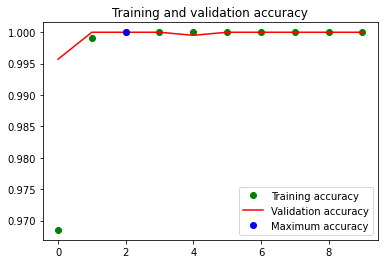

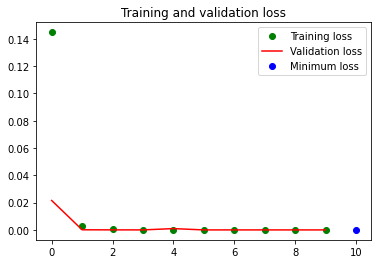

In [24]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Maximum accuracy')
plt.title('Training and validation accuracy')
plt.legend()
print("Best accuracy epoch : % d, Value : % .1f" %(max_val_acc_epoch, max_val_acc)) 
plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.title('Training and validation loss')
plt.legend()
print("Best loss epoch : % d, Value : % .10f" %(min_val_loss_epoch, min_val_loss))

plt.show()

# **Model retraining**

By analyzing the performance of the model in both the training and validatios sets, we can see that the model reachs its optimal performance in the third epoch, so as good practice, we can retrain the model with the exact same configuration except for the number of epochs, which will be set to three.

In [26]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(18, activation='softmax'))

from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [27]:
#Retraining of the model
history = model.fit(
      train_generator,
      batch_size=9,
      steps_per_epoch=254, 
      epochs= 3)

Epoch 1/3
254/254 [==============================] - 8s 24ms/step - loss: 0.0748 - acc: 0.9821
Epoch 2/3
254/254 [==============================] - 6s 24ms/step - loss: 0.0028 - acc: 0.9996
Epoch 3/3
254/254 [==============================] - 7s 26ms/step - loss: 1.5181e-04 - acc: 1.0000


As good practice, we can save the retrained model:

In [28]:
model.save('/content/drive/My Drive/Thermal_Face_Recognition_Model/face_recognition_model1.h5')

And load the same model when required:

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/My Drive/Thermal_Face_Recognition_Model/face_recognition_model1.h5', compile=False)

# **Final model evaluation using the test set**

In [29]:
#Test stage
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(72, 96),
        batch_size=1,
        color_mode='rgb',
        class_mode='categorical')

Found 10252 images belonging to 18 classes.


In [30]:
test_loss, test_acc = model.evaluate(test_generator, steps=10252)
print('Recognition rate: ', test_acc)

10252/10252 [==============================] - 83s 8ms/step - loss: 3.9682e-05 - acc: 1.0000
Recognition rate:  1.0


In [31]:
print('Test loss: ', test_loss)

Test loss:  3.968216697103344e-05


# **Deep diving in the predictions**

**Single predictions**

The next cell is useful to perform single predictions for specific individual. In the example, we make the prediction for the thermal image named 01349.jpg from the class/person/face 17 and located in the test set. 

In [50]:
from PIL import Image

width = 96
height = 72
image_path = 'test/face17/01349.jpg'
image_face = Image.open(image_path)
image_face = image_face.resize((width, height), Image.ANTIALIAS)
image_face = np.array(image_face) #La imagen se convierte en un arreglo
image_face = image_face / 255.0
image_face = np.expand_dims(image_face, axis = 0)
image_face = np.expand_dims(image_face, axis = -1) # image_face: (1, 72, 96, 1) #Tensor
image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3) # image_face: (1, 72, 96, 3)
print(image_face.shape)
prediction = model.predict(image_face)
print('This thermal image belongs to person ', np.argmax(prediction)+1)

(1, 72, 96, 3)
1/1 [==============================] - 0s 32ms/step
This thermal image belongs to person  17


**General**

The next cell allows to make predictions for the entire test set, this will be useful to calculate the confusion matrix later.

In [34]:
predictions = []
labels = []
for individual in range(1,19):
  if (individual) < 10:
    face = 'face0{}/'.format(individual)
  elif (individual) >= 10:
    face = 'face{}/'.format(individual)
  for index in range(len(os.listdir('train/'+face)) + len(os.listdir('validation/'+face)), len(os.listdir('train/'+face)) + len(os.listdir('validation/'+face)) + len(os.listdir('test/'+face))):
    width = 96
    height = 72
    if index < 100:
      image_face = Image.open('test/'+face+'00{}.jpg'.format(index))
    else:
      image_face = Image.open('test/'+face+'0{}.jpg'.format(index))
    image_face = image_face.resize((width, height), Image.ANTIALIAS)
    image_face = np.array(image_face)
    image_face = image_face / 255.0
    image_face = np.expand_dims(image_face, axis = 0)
    image_face = np.expand_dims(image_face, axis = -1)
    image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
    prediction = model.predict(image_face)
    predictions.append(np.argmax(prediction)+1)
    labels.append(individual)

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 26ms/step


We are going to generate a list with representative names for the 18 classes corresponding to the 18 individuals. Later, this list will be used to construct an illustrative confusion matrix.

In [47]:
name_labels = []
for i in range(18):
  name_labels.append("P_{}".format(i+1))

# **Performance evaluation using a confusion matrix and the F1-Score**

**Confusion matrix**

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(9, 9))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

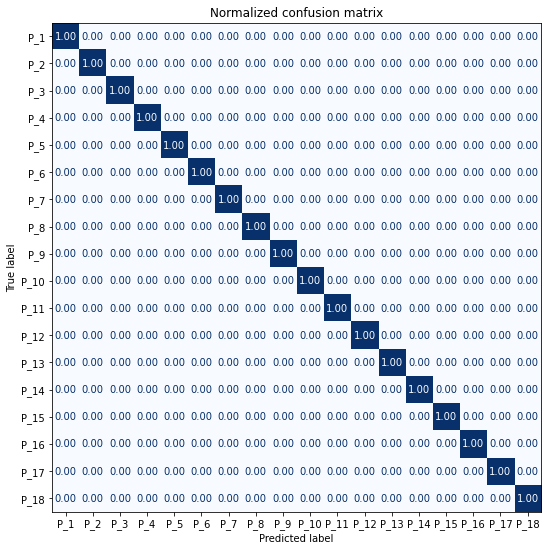

In [48]:
plot_confusion_matrix(predictions, labels, name_labels)

**Precison, Recall and F1-Score**

In [49]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.7f' % precision_score(y_true=labels, y_pred=predictions, average='macro'))
print('Recall: %.7f' % recall_score(y_true=labels, y_pred=predictions, average='macro'))
print('F1: %.7f' % f1_score(y_true=labels, y_pred=predictions, average='macro'))

Precision: 1.0000000
Recall: 1.0000000
F1: 1.0000000


In this project, we build a thermal face recognition system from scratch, showing how to perform data processing of thermal images, which allows to the machine learning practitioner to have a full control on the design of the dataset. We also showed how to efficiently train a convolutional neural network using the fine-tuning strategy, and finally, we provided proper code to conduct the evaluation process of a trained convolutional neural network.